In [1]:
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.search import ffa_search
from pyloki.simulation.pulse import PulseSignalConfig
from pyloki.utils import np_utils

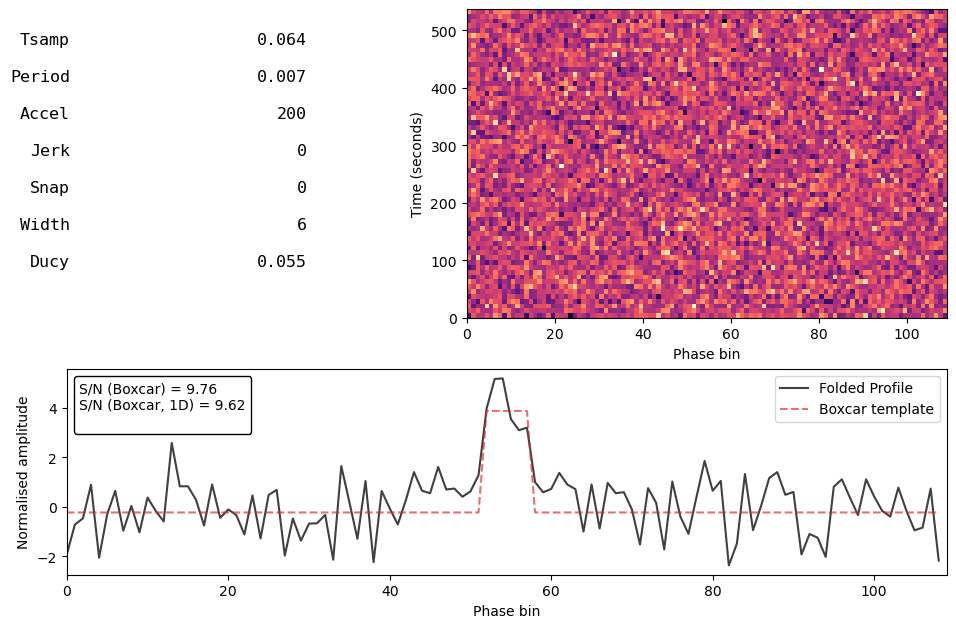

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 200
nsamps = 2**23
mod_kwargs = {"acc": accel}
cfg = PulseSignalConfig(
    period=pulsar_period,
    dt=dt,
    nsamps=nsamps,
    snr=10,
    ducy=0.1,
    mod_kwargs=mod_kwargs,
)
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [ ]:
tol_bins = 2  # cfg.tol_bins
fold_bins = 64  # cfg.fold_bins_ideal
p = ParamLimits.from_upper([accel, cfg.freq], (-accel * 3, accel * 3), cfg.tobs)
print(p.limits)
bseg_brute = cfg.nsamps // 256
search_cfg = PulsarSearchConfig(
    nsamps=cfg.nsamps,
    tsamp=cfg.dt,
    nbins=fold_bins,
    tol_bins=tol_bins,
    param_limits=p.limits,
    bseg_brute=bseg_brute,
    ducy_max=0.3,
    wtsp=1.1,
)
dyp, pgram = ffa_search(tim_data, search_cfg)

[(np.float64(-600.0), np.float64(600.0)), (np.float64(142.78039391714307), np.float64(142.93389179714265))]


2025-03-26 16:45:23 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [1.19224545e+05 2.98023224e-02]

                    INFO     - pyloki.ffa - ffa level:  0, leaves: 2.32, fold dims: (256, 1, 5, 2, 64)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.033 seconds

Output()

2025-03-26 16:45:28 INFO     - pyloki.ffa - ffa level:  1, leaves:  3.32, fold dims: (128, 1, 10, 2, 64)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  4.32, fold dims: (64, 1, 20, 2, 64)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  5.36, fold dims: (32, 1, 41, 2, 64)

                    INFO     - pyloki.ffa - ffa level:  4, leaves:  7.36, fold dims: (16, 2, 82, 2, 64)

                    INFO     - pyloki.ffa - ffa level:  5, leaves: 10.68, fold dims: (8, 10, 164, 2, 64)

                    INFO     - pyloki.ffa - ffa level:  6, leaves: 13.72, fold dims: (4, 41, 329, 2, 64)

                    INFO     - pyloki.ffa - ffa level:  7, leaves: 16.72, fold dims: (2, 164, 659, 2, 64)

2025-03-26 16:45:29 INFO     - pyloki.ffa - ffa level:  8, leaves: 19.73, fold dims: (1, 659, 1318, 2, 64)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [1.81922219e+00 1.16415322e-04]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 5.857 seconds

In [4]:
idx_freq = np_utils.find_nearest_sorted_idx(dyp.param_arr[-1], cfg.freq)
idx_acc = np_utils.find_nearest_sorted_idx(dyp.param_arr[-2], cfg.mod_kwargs["acc"])
true_params_idx = (idx_acc, idx_freq)
print(f"True param indices: {true_params_idx}")
print(f"Best param indices: {pgram.find_best_indices()}")
print(pgram.get_summary())

True param indices: (439, 658)
Best param indices: (np.int64(436), np.int64(658), np.int64(9))
Best S/N: 8.72
Best Period: 0.007000002851174822
Best accel: 194.54545454545453
Best freq: 142.85708466992529
Best width: 10


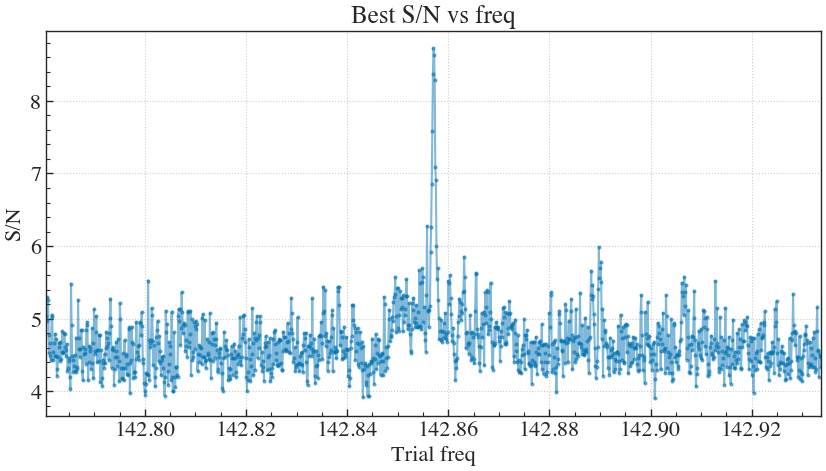

In [5]:
fig = pgram.plot_1d("freq", figsize=(10, 5))
plt.show()

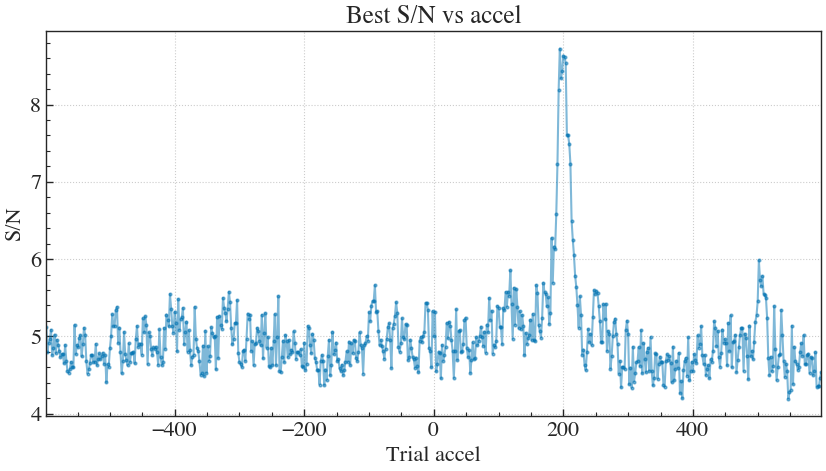

In [6]:
fig = pgram.plot_1d("accel", figsize=(10, 5))
plt.show()

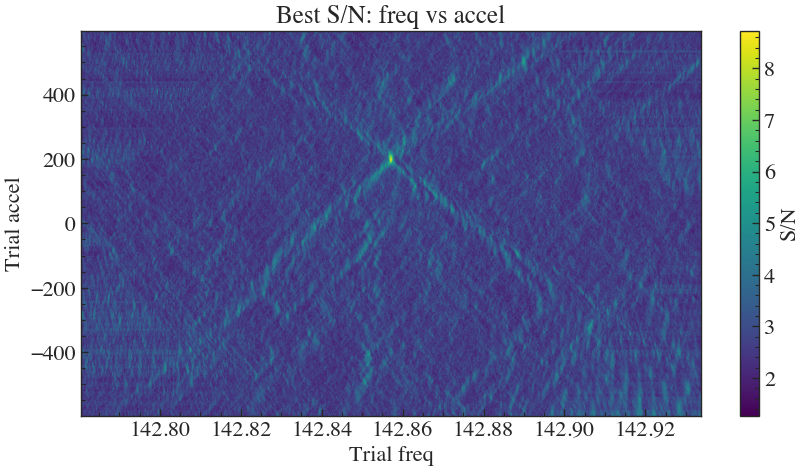

In [7]:
fig = pgram.plot_2d("freq", "accel", figsize=(10, 5))
plt.show()